In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
idx2label = [
    'O',
    'B-ORG',
    'I-ORG',
    'B-LOC',
    'I-LOC',
    'B-PER',
    'I-PER',
    'B-MISC',
    'I-MISC'
]
label2idx = {v: k for k, v in enumerate(idx2label)}

In [3]:
import os

data_dir = r'data/dataset_ner/'
data_name = 'dev.txt'

with open(os.path.join(data_dir, data_name)) as f:
    lines = f.readlines()

all_sentence = list()
sentence = list()
all_labels = list()
labels = list()
for l in lines:
    try:
        token, _, _, ner_label = l.strip().split()
        sentence.append(token)
        labels.append(ner_label)
    except ValueError:
        all_sentence.append(sentence)
        all_labels.append(labels)
        sentence = list()
        labels = list()

for sentence, labels in zip(all_sentence, all_labels):
    assert len(sentence) == len(labels)

lb_indices = [np.array([[0]] + [[label2idx[lb]] for lb in lbs]) for lbs in all_labels]
lens = [len(lb) for lb in lb_indices]

X = np.concatenate(lb_indices)

In [4]:
tr_matrix = np.zeros([len(label2idx), len(label2idx)])
for lb_index in lb_indices:
    for l0, l1 in zip(lb_index[:-1], lb_index[1:]):
        tr_matrix[l0[0], l1[0]] += 1
tr_matrix = tr_matrix / tr_matrix.sum(axis=1).reshape(len(label2idx), 1)
emission_probability = np.identity(len(idx2label))*0.5 + np.ones([len(idx2label)]) * 0.05
# emission_probability = np.identity(len(idx2label))
start_prob = np.zeros(len(idx2label))
start_prob[0] = 1

In [9]:
model = hmm.MultinomialHMM(n_components=len(idx2label), n_iter=15, verbose=True, init_params='e')

model.startprob_ = start_prob
# self.emissionprob_ = emission_probability
model.transmat_ = tr_matrix

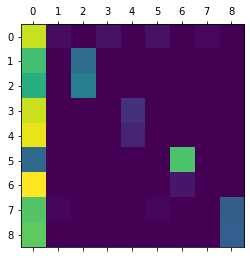

In [10]:
plt.matshow(tr_matrix)

In [11]:
model.fit(X, lens)

         1     -159211.6422             +nan
         2      -38999.6048     +120212.0374
         3      -38636.1322        +363.4726
         4      -38346.0649        +290.0672
         5      -38015.4388        +330.6262
         6      -37618.5087        +396.9300
         7      -37108.8125        +509.6962
         8      -36471.0191        +637.7934
         9      -35962.2437        +508.7754
        10      -35684.6011        +277.6427
        11      -35454.0580        +230.5430
        12      -35195.2684        +258.7897
        13      -34898.4842        +296.7842
        14      -34578.4604        +320.0238
        15      -34255.4607        +322.9996


MultinomialHMM(algorithm='viterbi', init_params='e', n_components=9, n_iter=15,
               params='ste',
               random_state=RandomState(MT19937) at 0x7F8BFA03AEB8,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0, verbose=True)

In [ ]:
for i, lbs in enumerate(lb_indices):
    Z = model.predict(lbs)
    print([idx2label[z] for z in Z])
    print([idx2label[lb] for lb in lbs.T[0]])
    print()
    if i>10:
        break

In [13]:
accuracy = 0
for i, lbs in enumerate(lb_indices):
    Z = model.predict(lbs)
    accuracy += np.sum(np.array([idx2label[z] for z in Z]) ==
                       np.array([idx2label[lb] for lb in lbs.T[0]])) / len(Z)
accuracy /= i+1
accuracy

0.16772418603780936

In [ ]:
plt.matshow(self.transmat_)

In [ ]:
plt.matshow(self.emissionprob_)